In [1]:
import os
path = r"C:\Users\yana\Desktop\github\parametric_portfolio_boosting\ppboost"
os.chdir(path)
from src.utils.optimizer_weight import *
import pulp
import numpy as np

In [3]:
# リバランス時点の銘柄投資数
stock_num = 200 #100
# 企業特性合成ポートフォリオの数
K = 10 #6
# 時点数(T+1時点目はリバランス時点)
T = 60
stock_num_list = [stock_num for t in range(T+1)]
stock_name = ["stock_"+str(i+1) for i in range(stock_num)]
beta = [0.5+(1/stock_num)*i for i in range(stock_num)]
np.random.seed(3)

weight_bench = np.ones((stock_num))/stock_num
weight_hold = np.ones((stock_num))/stock_num
weights_char = []
for t in range(T+1):
    weights_ = np.random.normal(0, 1, (K, stock_num_list[t]))
    weights_ = (weights_-np.mean(weights_, 1, keepdims=True)) / \
        np.std(weights_, 1, keepdims=True)
    weights_char += [weights_]
rit = [beta*np.random.normal(0, 0.1, (stock_num_list[t])) + np.random.normal(0, 0.1, (stock_num_list[t])) for t in range(T)]
is_print = True

In [4]:
# check function 
turnover = 0.5
target_risk = 0.001
weight, theta = solve_opt(
    weight_bench,
    weights_char,
    weight_hold,
    rit,
    target_risk,
    turnover,
    stock_name,
    is_print,    
)

Status Optimal 目的関数値 = 0.00091133329 turnover 0.2
k_sum = -0.0


<AxesSubplot:>

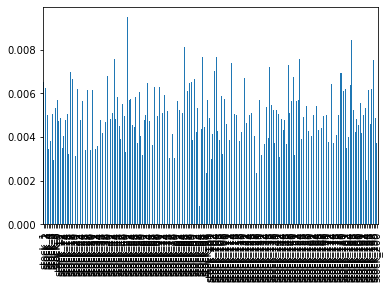

In [5]:
weight.plot.bar()